In [1]:
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data1=pd.read_csv('Problem2_FInalConversions',delimiter='\t')

In [4]:
data1.head()

,2017-07-26 00:00:10.465,0,A293532,52.14
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


In [5]:
data2=pd.read_csv('Problem2_Site_BrowingBehavior',delimiter='\t',header=None)

In [6]:
data2.head()

,0,1,2
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79794 entries, 0 to 79793
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2017-07-26 00:00:10.465  79794 non-null  object 
 1   0                        79794 non-null  int64  
 2   A293532                  79794 non-null  object 
 3   52.14                    79794 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       int64 
 2   2       object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [9]:
data2.columns=['Timestamp','UserID','Website_section_vsited']

In [10]:
data2.head()

,Timestamp,UserID,Website_section_vsited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'product'),
  Text(1, 0, 'default'),
  Text(2, 0, 'product-listing-category'),
  Text(3, 0, 'content'),
  Text(4, 0, 'home'),
  Text(5, 0, 'cart'),
  Text(6, 0, 'product-listing-search'),
  Text(7, 0, 'iroa'),
  Text(8, 0, 'shoplive'),
  Text(9, 0, 'productNotFound'),
  Text(10, 0, 'product-listing-custom'),
  Text(11, 0, 'signupcomplete'),
  Text(12, 0, 'mys'),
  Text(13, 0, 'error'),
  Text(14, 0, 'lorigreiner'),
  Text(15, 0, 'wishlist'),
  Text(16, 0, 'category')])

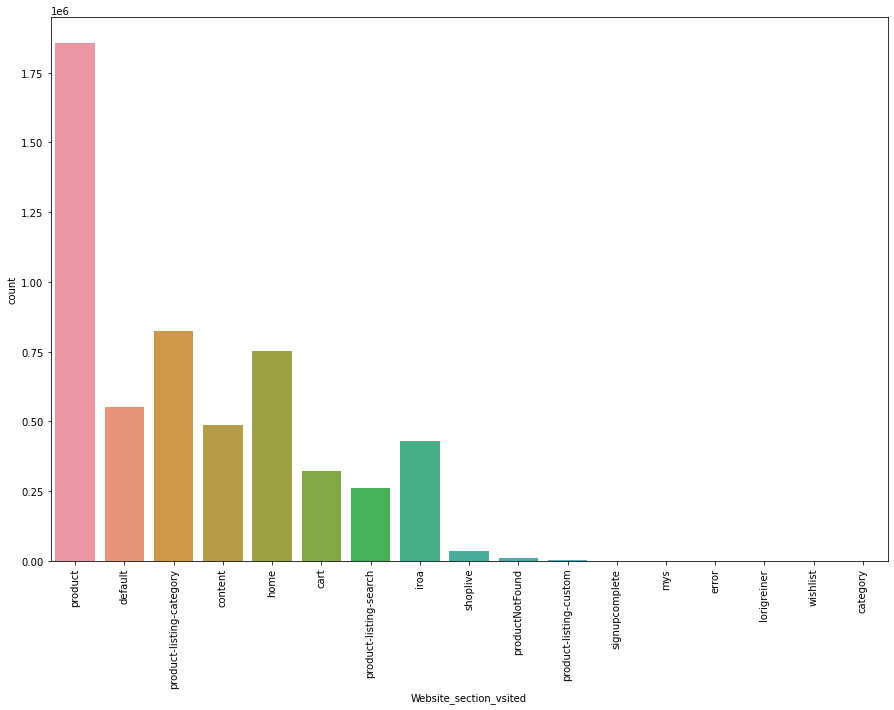

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(data2['Website_section_vsited'])
plt.xticks(rotation=90)

In [12]:
# to check how may time a user visited
login_count=data2.groupby('UserID').Website_section_vsited.agg(['count']).reindex(data2.UserID).reset_index()
login_count.columns=['UserID','No_of_times_visited']
login_count.drop_duplicates(inplace=True)
login_count.head()

,UserID,No_of_times_visited
0,0,1407879
101129,544439661706349,10
101130,634394594974068,19
101134,887103105578626,10
101136,962713767308725,18


In [13]:
data1.columns=['Timestamp','UserID','products_purchased','cart_value']

In [14]:
data1.head()

,Timestamp,UserID,products_purchased,cart_value
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


In [15]:
#plt.figure(figsize=(15,10))
#sns.countplot(data1['products_purchased'])
#plt.xticks(rotation=90)

In [16]:
value_sum=data1.groupby('UserID').cart_value.agg(['sum']).reindex(data1.UserID).reset_index()
value_sum.columns=['UserID','cart_total_value']
value_sum.drop_duplicates(inplace=True)
value_sum.head()

,UserID,cart_total_value
0,0,1375049.52
547,5942997097932061,157.95
548,23951842225160889,60.96
550,30833658052409950,216.12
551,33873861847792934,53.24


In [17]:
df=pd.merge(data1,data2,on=['UserID'],how='inner',left_index=True,right_index=True)

# df=pd.merge(data2.reset_index())

In [18]:
df.head()

,Timestamp_x,UserID,products_purchased,cart_value,Timestamp_y,Website_section_vsited
0,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:19.625,0,H211801,34.35,2017-07-26 00:45:39.197,content


In [19]:
df['Timestamp_x']=df['Timestamp_x'].astype(str)
df['Timestamp_y']=df['Timestamp_y'].astype(str)


df['Timestamp_x']=df['Timestamp_x'].str.split('.',expand=True)
df['Timestamp_y']=df['Timestamp_y'].str.split('.',expand=True)


In [20]:
df.head()

,Timestamp_x,UserID,products_purchased,cart_value,Timestamp_y,Website_section_vsited
0,2017-07-26 00:00:12,0,H209597,31.50,2017-07-26 00:01:40,product
1,2017-07-26 00:00:12,0,H211370,30.48,2017-07-26 00:03:18,product
2,2017-07-26 00:00:14,0,A282331,51.00,2017-07-26 00:36:59,default
3,2017-07-26 00:00:16,0,H211410,16.74,2017-07-26 00:41:17,product-listing-category
4,2017-07-26 00:00:19,0,H211801,34.35,2017-07-26 00:45:39,content


In [21]:

df['date_time_x']=pd.to_datetime(df['Timestamp_x'])
df['date_time_y']=pd.to_datetime(df['Timestamp_y'])

def Time_conversion(df):
    time_delta=df['date_time_y']-df['date_time_x']
    total_seconds=time_delta.total_seconds()
    minutes=total_seconds/60
    return abs(minutes)

In [22]:
df['Time_spent_minutes_day']=df.apply(Time_conversion,axis=1)

df.drop(['Timestamp_x','Timestamp_y','date_time_x','date_time_y'],axis=1,inplace=True)
df.head()

,UserID,products_purchased,cart_value,Website_section_vsited,Time_spent_minutes_day
0,0,H209597,31.50,product,1.466667
1,0,H211370,30.48,product,3.100000
2,0,A282331,51.00,default,36.750000
3,0,H211410,16.74,product-listing-category,41.016667
4,0,H211801,34.35,content,45.333333


In [23]:
df['UserID'].value_counts()

0                      20196
6999042003656970156       31
559346213618742389        22
9050159186422090402       20
1536590739380574003       20
                       ...  
8721108960309386090        1
6550192714371123312        1
8875479531064627858        1
6605416823766117807        1
1731797111331025079        1
Name: UserID, Length: 41009, dtype: int64

In [24]:
# money spent by each user

df_cart=df.groupby('UserID')['cart_value'].agg(['sum']).reindex(df['UserID']).reset_index()
df_cart.drop_duplicates(inplace=True)
df_cart.columns=['UserID','Total_cart_value']

In [25]:
df_cart.head()

,UserID,Total_cart_value
0,0,1375049.52
547,5942997097932061,157.95
548,23951842225160889,60.96
550,30833658052409950,216.12
551,33873861847792934,53.24


In [26]:
df_product=df.groupby('UserID')['products_purchased'].agg(['count']).reindex(df['UserID']).reset_index()
df_product.drop_duplicates(inplace=True)
df_product.columns=['UserID','Total_product_purchased']
df_product.head()

,UserID,Total_product_purchased
0,0,20196
547,5942997097932061,1
548,23951842225160889,2
550,30833658052409950,5
551,33873861847792934,1


In [27]:
# total timestamp of userid
df_cart_timestamp=df.groupby('UserID')['Time_spent_minutes_day'].agg(['sum']).reindex(df['UserID']).reset_index()
df_cart_timestamp.drop_duplicates(inplace=True)


pd.set_option('display.float_format', lambda x: '%.3f' % x)


df_cart_timestamp.columns=['UserID','Total_time_spent']
df_cart_timestamp.head()


,UserID,Total_time_spent
0,0,11780975.983
547,5942997097932061,0.450
548,23951842225160889,52.067
550,30833658052409950,381.200
551,33873861847792934,10.067


In [28]:
df.head()

,UserID,products_purchased,cart_value,Website_section_vsited,Time_spent_minutes_day
0,0,H209597,31.500,product,1.467
1,0,H211370,30.480,product,3.100
2,0,A282331,51.000,default,36.750
3,0,H211410,16.740,product-listing-category,41.017
4,0,H211801,34.350,content,45.333


In [29]:
# merging all 4 dataset

df.drop_duplicates(subset='UserID',keep='first',inplace=True)

df=pd.merge(df,df_cart,on=['UserID'],how='inner',left_index=True,right_index=True)
df=pd.merge(df,df_product,on=['UserID'],how='inner',left_index=True,right_index=True)
df=pd.merge(df,df_cart_timestamp,on=['UserID'],how='inner',left_index=True,right_index=True)

df=pd.merge(df,login_count,on=['UserID'],how='inner')

df.head()

,UserID,products_purchased,cart_value,Website_section_vsited,Time_spent_minutes_day,Total_cart_value,Total_product_purchased,Total_time_spent,No_of_times_visited
0,0,H209597,31.500,product,1.467,1375049.520,20196,11780975.983,1407879
1,23951842225160889,H211370,33.480,product,26.033,60.960,2,52.067,8
2,30833658052409950,H211394,44.680,default,54.917,216.120,5,381.200,13
3,33873861847792934,H211800,53.240,content,10.067,53.240,1,10.067,5
4,42949238806579040,A286591,30.000,product,14.433,52.480,2,1424.217,20


In [30]:
df.drop(['UserID','products_purchased','cart_value','Website_section_vsited','Time_spent_minutes_day'],axis=1,inplace=True)

In [31]:
df.head()

,Total_cart_value,Total_product_purchased,Total_time_spent,No_of_times_visited
0,1375049.520,20196,11780975.983,1407879
1,60.960,2,52.067,8
2,216.120,5,381.200,13
3,53.240,1,10.067,5
4,52.480,2,1424.217,20


In [32]:
# buy probability 

df['Buy_probability']=(df['Total_product_purchased']/df['No_of_times_visited'])
df.head()

,Total_cart_value,Total_product_purchased,Total_time_spent,No_of_times_visited,Buy_probability
0,1375049.520,20196,11780975.983,1407879,0.014
1,60.960,2,52.067,8,0.250
2,216.120,5,381.200,13,0.385
3,53.240,1,10.067,5,0.200
4,52.480,2,1424.217,20,0.100


In [33]:
# user Rank Score
df['User_Score_Rank']=(df['Buy_probability']*df['Total_cart_value'])

df.head()

,Total_cart_value,Total_product_purchased,Total_time_spent,No_of_times_visited,Buy_probability,User_Score_Rank
0,1375049.520,20196,11780975.983,1407879,0.014,19725.062
1,60.960,2,52.067,8,0.250,15.240
2,216.120,5,381.200,13,0.385,83.123
3,53.240,1,10.067,5,0.200,10.648
4,52.480,2,1424.217,20,0.100,5.248


In [34]:
# dropping first row

df.drop(df.index[0],inplace=True)
df.head()

,Total_cart_value,Total_product_purchased,Total_time_spent,No_of_times_visited,Buy_probability,User_Score_Rank
1,60.960,2,52.067,8,0.250,15.240
2,216.120,5,381.200,13,0.385,83.123
3,53.240,1,10.067,5,0.200,10.648
4,52.480,2,1424.217,20,0.100,5.248
5,111.980,2,80.583,18,0.111,12.442


Text(0.5, 1.0, 'Total time spent')

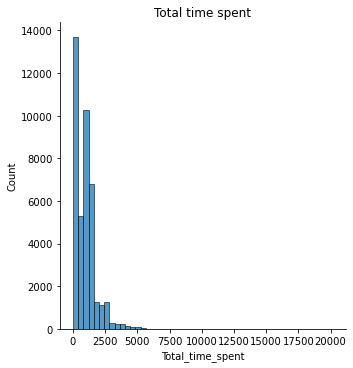

In [35]:
sns.displot(df['Total_time_spent'],kde=False,bins=50)
plt.title('Total time spent')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop(['User_Score_Rank'],axis=1)
y=df.iloc[:,-1]
round(y,2)
   
sc=StandardScaler()

X=sc.fit_transform(X) # standardising the features as the data is highly skewed

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(Xtrain.shape,Xtest.shape)
print(ytrain.shape,ytest.shape)

(32682, 5) (8171, 5)
(32682,) (8171,)


In [37]:
y.describe()

count   40853.000
mean       14.951
std        43.690
min         0.029
25%         2.993
50%         6.862
75%        15.334
max      4528.173
Name: User_Score_Rank, dtype: float64

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

classifier=XGBRegressor(colsample_bytree=0.4,
                        gamma=0,
                       learning_rate=0.22,
                       max_depth=3,
                       min_child_weight=1.5,
                       n_estimators=1000,
                       reg_alpha=0.75,
                       reg_lambda=0.45,
                       subsample=0.6,
                       seed=42)

classifier.fit(Xtrain,ytrain)

pred=classifier.predict(Xtest)

print('RMSE :',sqrt(mean_squared_error(ytest,pred)))
print('MSE  :',mean_squared_error(ytest,pred))
print('R2   :',r2_score(ytest,pred))

RMSE : 6.257601603324144
MSE  : 39.15757782592489
R2   : 0.9640547754128985


In [39]:
X

array([[-0.22589168,  0.52482766, -0.99465308, -0.49769273,  0.67038749],
       [ 0.62251926,  3.40820374, -0.61776486, -0.30260797,  1.53480718],
       [-0.26810444, -0.4362977 , -1.04274698, -0.61474359,  0.34931732],
       ...,
       [ 0.01098098,  0.52482766,  2.14173716, -0.61474359,  1.63359801],
       [-0.36521567, -0.4362977 ,  0.51881614, -0.30260797, -0.44100926],
       [-0.06732041, -0.4362977 ,  0.49148659, -0.61474359,  0.34931732]])

In [40]:
y

1       15.240
2       83.123
3       10.648
4        5.248
5       12.442
         ...  
40849   19.340
40850    3.884
40851   41.712
40852    2.729
40853   17.992
Name: User_Score_Rank, Length: 40853, dtype: float64

In [44]:
from sklearn.ensemble import RandomForestRegressor
classifier_rf=RandomForestRegressor()
classifier_rf.fit(Xtrain,ytrain)

#classifier_rf.fit(Xtrain,ytrain)
pred=classifier_rf.predict(Xtest)

print("RMSE : ",sqrt(mean_squared_error(ytest,pred)))
print("MSE : ",mean_squared_error(ytest,pred))
print("R2 : ",r2_score(ytest,pred))

RMSE :  5.091124077021306
MSE :  25.919544367626052
R2 :  0.9762068060585498


In [46]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [200, 300, 400, 500, 600]
max_features = ['auto', 'sqrt']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv2 = RandomizedSearchCV(estimator = RandomForestRegressor(), 
            param_distributions = random_grid, n_iter = 50,
            scoring = 'neg_mean_absolute_error', cv = 5, 
            verbose=5, random_state=42, n_jobs = -1,return_train_score = True)

random_cv2.fit(Xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 50, 60, 80],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
#from sklearn.model_selection import KFold, cross_validate,StratifiedKFold

#kf = KFold(n_splits=5, shuffle=True)
#skf= StratifiedKFold(n_splits=5, shuffle=True)

#cv_results = cross_validate(classifier, X, y, cv=skf, scoring="accuracy", return_train_score=True)
#cv_results

In [47]:
random_cv2.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [48]:
classifier=RandomForestRegressor(**random_cv2.best_params_)
classifier.fit(Xtrain,ytrain)

pred=classifier.predict(Xtest)

print("RMSE : ",sqrt(mean_squared_error(ytest,pred)))
print("MSE : ",mean_squared_error(ytest,pred))
print("R2 : ",r2_score(ytest,pred))

RMSE :  5.254276170867517
MSE :  27.607418079746218
R2 :  0.9746573997105235


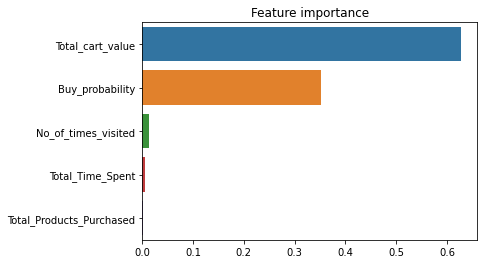

In [49]:
imp = pd.Series(data=classifier.feature_importances_, index=['Total_cart_value', 'Total_Products_Purchased', 
                                                             'Total_Time_Spent','No_of_times_visited', 
                                                             'Buy_probability']).sort_values(ascending=False)
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')